In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [98]:
import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten,Dense,Dropout,MaxPool2D,Conv2D
from sklearn.metrics import confusion_matrix, classification_report

# Importing MNIST Data

In [70]:
df_train = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
df_test = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

# data exploration

In [71]:
df_train.head(-5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27445,14,167,169,170,171,171,172,172,172,171,...,215,215,211,208,211,201,167,119,75,48
27446,19,133,135,138,141,143,144,144,145,145,...,0,0,1,4,4,0,0,0,0,0
27447,11,170,172,175,177,179,182,185,186,187,...,221,228,229,228,229,229,227,228,227,227
27448,12,149,151,153,157,159,161,164,165,168,...,108,165,167,163,159,153,147,148,139,196


In [72]:
df_test.head(-5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7162,10,130,131,131,134,133,135,137,136,136,...,128,106,107,63,11,147,194,182,176,124
7163,4,158,161,165,169,172,175,177,179,181,...,78,122,141,141,141,140,141,142,143,144
7164,14,141,144,146,149,153,156,158,161,161,...,199,203,202,201,201,201,200,200,201,201
7165,8,158,160,160,161,161,161,164,162,162,...,177,178,176,174,173,172,171,169,169,167


# Extracting the labels from the data

In [73]:
train_label = df_train["label"]
test_label = df_test["label"]

In [74]:
df_train.drop("label",axis=1,inplace=True)
df_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [75]:
df_test.drop("label",axis=1,inplace=True)
df_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [76]:
x_train = df_train.values
x_test = df_test.values

In [77]:
x_train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [78]:
x_test

array([[149, 149, 150, ..., 112, 120, 107],
       [126, 128, 131, ..., 184, 182, 180],
       [ 85,  88,  92, ..., 225, 224, 222],
       ...,
       [190, 191, 190, ..., 211, 209, 208],
       [201, 205, 208, ...,  67,  70,  63],
       [173, 174, 173, ..., 195, 193, 192]])

In [79]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [80]:
lb = LabelBinarizer()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

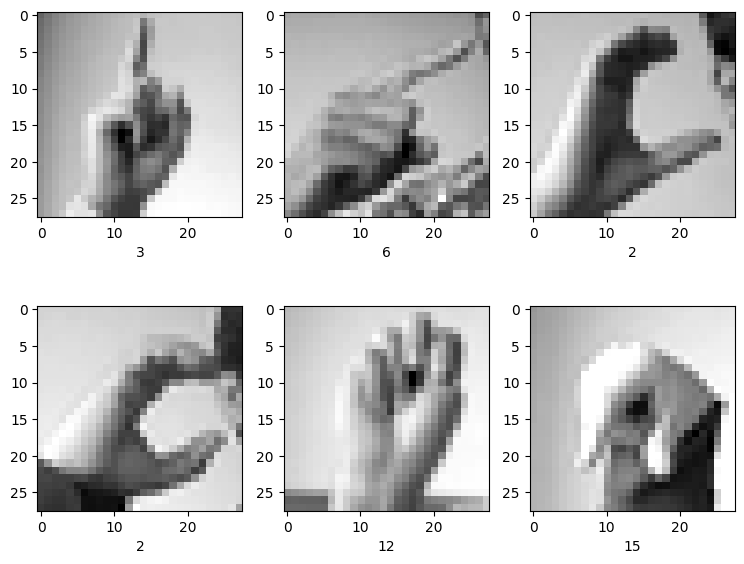

In [81]:
plt.figure(figsize=(9,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.xlabel(np.argmax(y_train[i]))
    
plt.show()

# **Create an ImageDataGenerator and do Image Augmentation**

In [82]:
train_datagen = ImageDataGenerator(rescale=(1./255),rotation_range = 30,
                                  width_shift_range = 0.2,height_shift_range =0.2,
                                  shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1./255))

# **Define the model**

In [83]:
from tensorflow.keras import Sequential
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(28,28,1),activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

#Dense and output layers
model.add(Dense(512,activation='relu'))
model.add(Dense(24,activation="softmax"))

In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 128)       

In [85]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [86]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

checkpoint = ModelCheckpoint('sign_lan.h5',monitor ='val_acc',verbose=1,save_best_only=True,mode='max')
earlystop = EarlyStopping(monitor = 'val_acc',verbose=1,mode='max')

In [87]:
# train the model 
history = model.fit_generator(generator = train_datagen.flow(x_train,y_train,batch_size=32),
                              validation_data = val_datagen.flow(x_test,y_test),epochs=15,verbose=1)


Epoch 1/15


/tmp/ipykernel_34/2151750465.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train_datagen.flow(x_train,y_train,batch_size=32),


858/858 [==============================] - 38s 43ms/step - loss: 2.4205 - accuracy: 0.2397 - val_loss: 1.2291 - val_accuracy: 0.6009
Epoch 2/15
858/858 [==============================] - 37s 43ms/step - loss: 1.1797 - accuracy: 0.6034 - val_loss: 0.5646 - val_accuracy: 0.8140
Epoch 3/15
858/858 [==============================] - 37s 43ms/step - loss: 0.7294 - accuracy: 0.7529 - val_loss: 0.4125 - val_accuracy: 0.8578
Epoch 4/15
858/858 [==============================] - 37s 43ms/step - loss: 0.5130 - accuracy: 0.8271 - val_loss: 0.2410 - val_accuracy: 0.9155
Epoch 5/15
858/858 [==============================] - 37s 43ms/step - loss: 0.3947 - accuracy: 0.8633 - val_loss: 0.2479 - val_accuracy: 0.9074
Epoch 6/15
858/858 [==============================] - 37s 43ms/step - loss: 0.3216 - accuracy: 0.8920 - val_loss: 0.1487 - val_accuracy: 0.9501
Epoch 7/15
858/858 [==============================] - 39s 46ms/step - loss: 0.2871 - accuracy: 0.9021 - val_loss: 0.1660 - val_accuracy: 0.9321
Epo

In [88]:
history.history['accuracy']

[0.23973774909973145,
 0.6033509373664856,
 0.7529411911964417,
 0.8271353244781494,
 0.863267183303833,
 0.8919686675071716,
 0.9020943641662598,
 0.9173192381858826,
 0.9289746880531311,
 0.9337461590766907,
 0.9461300373077393,
 0.9447459578514099,
 0.9498087763786316,
 0.9534510970115662,
 0.9558185935020447]

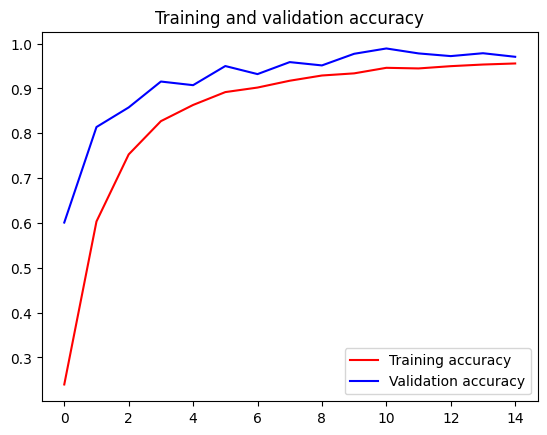

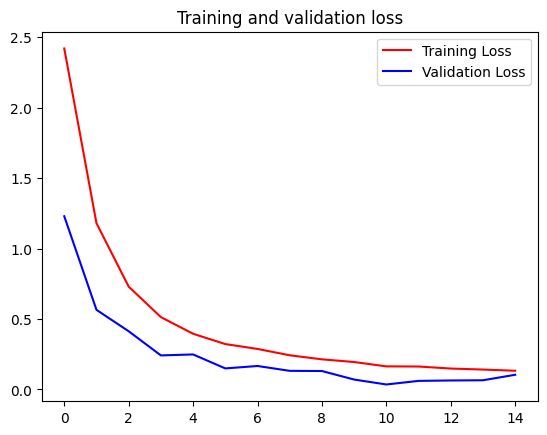

In [93]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()